# Axes Scene Building

One can distingish between two kinds of plots:  
* quantitative scientific plots with numbers and dimensions to describe data (e.g. made with matplotlib).
* qualitative explanatory plots that convey a message in the clearest way possible (e.g. made with manim) 

In this tutorial, I will take you on a journey from choosing a topic, making a scientific plot, and then transforming it into an explanatory plot with manim:

![image description](_static/carnot.gif)



First, we do research on the topic of choice, and look up the formulas that I need. 
I chose the carnot process, where I want to see how the pressure **pressure p** is altering, when  **volume V**  or **temperature T** are changing.
I don't want to expain the details here. This tutorial should show you how to build manim scenes, not teach you how the carnot cycle works.  
The only think we need to know is that the carnotcycle obies these formula:

* $pV = RT $ ideal gas equation
* $pV = const $ upper and lower curve (also called "isotherm")
* $pV^k = const $ with $ k = 5/3$ for the left and right curve (also called "adiabatic")

This is all the information we need, to build the scene.  
As we need reference points in the diagram, we first define some default values.  
For temperatures, we choose $ 20 °\, \text{C} $ and $300°\, \text{C} $   
For volume 1 we choose *1 liter*, and volume 2 we choose *2 liter*.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import zero_Celsius
plt.rcParams['figure.dpi'] = 150  

Tmax = zero_Celsius +300
Tmin = zero_Celsius +20
R = 8.314
kappa = 5/3
V1= 1
V2= 2

Now, it is good to first have a look on the plot via matplotlib, as for now implementing and debugging formulas is important, design is not yet important.

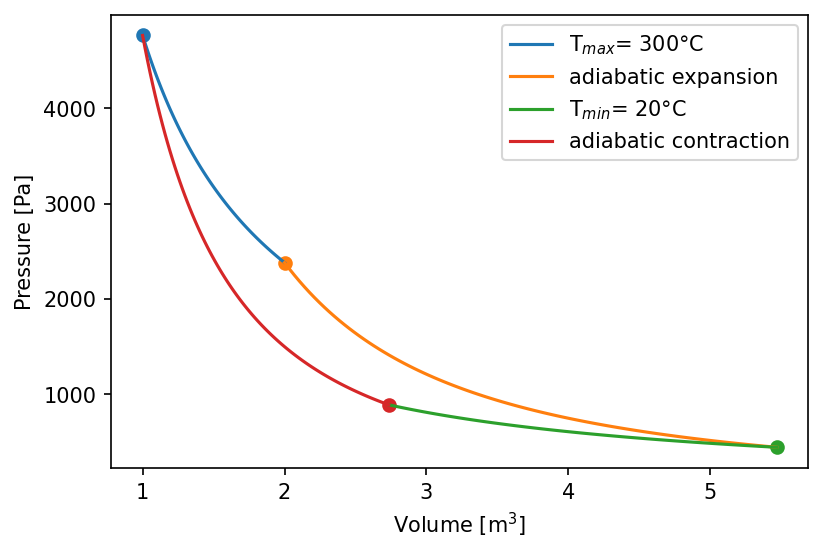

In [27]:
p1 = R*Tmax/V1 # ideal gas equation
p2 = p1*V1/V2

V3 = (Tmax/Tmin * V2**(kappa-1))**(1/(kappa-1))
p3 = p2* V2**kappa / V3**kappa

V4 = (Tmax/Tmin * V1**(kappa-1))**(1/(kappa-1))
p4 = p3*V3/V4

V12 = np.linspace(V1,V2,100)
V23 = np.linspace(V2,V3,100)
V34 = np.linspace(V3,V4,100)
V41 = np.linspace(V4,V1,100)

def p_isotherm(V,T):
    return (R*T)/V

def p_adiabatisch(V,p_start,v_start):
    return (p_start*v_start**kappa)/V**kappa

plt.plot(V12, p_isotherm(V12,Tmax),label = "T$_{max}$" +f"= {Tmax-zero_Celsius:.0f}°C")
plt.plot(V23, p_adiabatisch(V23, p2,V2),label = f"adiabatic expansion")
plt.plot(V34, p_isotherm(V34,Tmin),label = "T$_{min}$" +f"= {Tmin-zero_Celsius:.0f}°C")
plt.plot(V41, p_adiabatisch(V41, p4,V4),label = f"adiabatic contraction")

plt.legend()
plt.scatter(V1,p1)
plt.scatter(V2,p2)
plt.scatter(V3,p3)
plt.scatter(V4,p4)

plt.ylabel("Pressure [Pa]")
plt.xlabel("Volume [m$^3$]")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,5))
plt.savefig("test.png")

Good! Now we come to part number 2:  
Building the explanatory plot!

In [28]:
from manim import *
param   = "-v WARNING -s -ql --disable_caching --progress_bar None Example"
paramH  = "-v WARNING -s -qh --disable_caching --progress_bar None Example"
paramp  = "-v WARNING    -ql --disable_caching --progress_bar None Example"
parampH = "-v WARNING    -qh --disable_caching --progress_bar None Example"

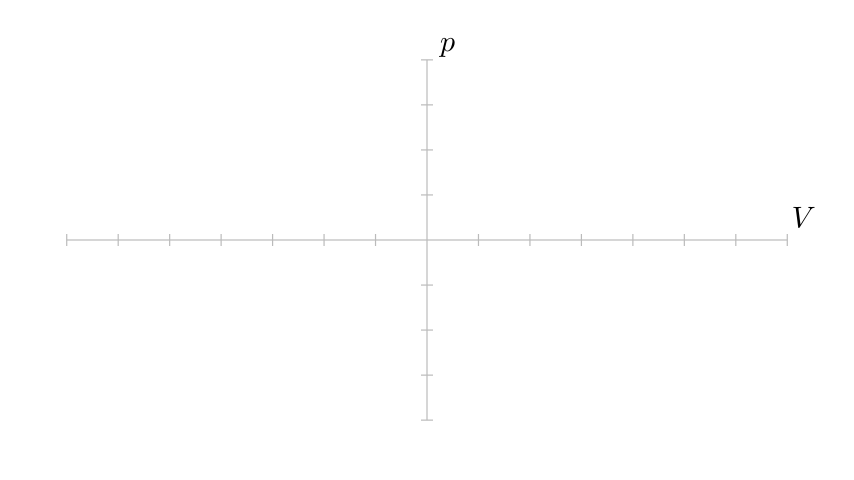

In [29]:
%%manim $param
class Example(Scene):
    def construct(self):
        my_ax = Axes()
        labels = my_ax.get_axis_labels(x_label="V", y_label="p")

        self.add(my_ax,labels)

In [31]:
Axes.set_default(color=GREY, tips= False) # changing defaults
MathTex.set_default(color=BLACK)
config.background_color=WHITE

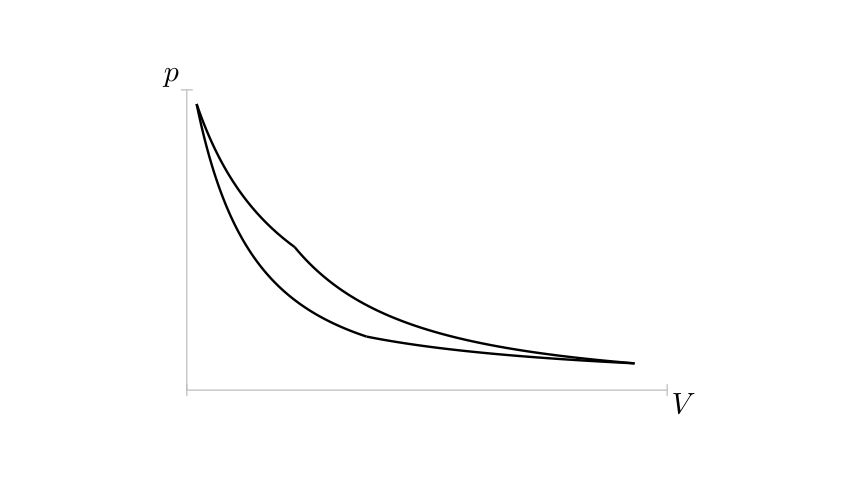

In [33]:
%%manim $param

ax = Axes(x_range=[0.9, 5.8, 4.9], y_range=[0, 5000, 5000],x_length=8, y_length=5) 
labels = ax.get_axis_labels(x_label="V", y_label="p")
labels[0].shift(.6*DOWN)
labels[1].shift(.6*LEFT)
isotherm12_graph = ax.get_graph(
    lambda x: p_isotherm(x, Tmax), x_range=[V1, V2,0.01], color=BLACK
)
adiabatisch23_graph = ax.get_graph(
    lambda x: p_adiabatisch(x, p2, V2) , x_range=[V2, V3,0.01], color=BLACK
)
isotherm34_graph = ax.get_graph(
    lambda x: p_isotherm(x, Tmin), x_range=[V3, V4,0.01], color=BLACK
)
adiabatisch41_graph = ax.get_graph(
    lambda x: p_adiabatisch(x, p4, V4), x_range=[V4, V1,0.01], color=BLACK
)
lines = VGroup(
    isotherm12_graph, adiabatisch23_graph, isotherm34_graph, adiabatisch41_graph
)

ax.add(labels)

class Example(Scene):
    def construct(self):
        self.add(ax,lines)

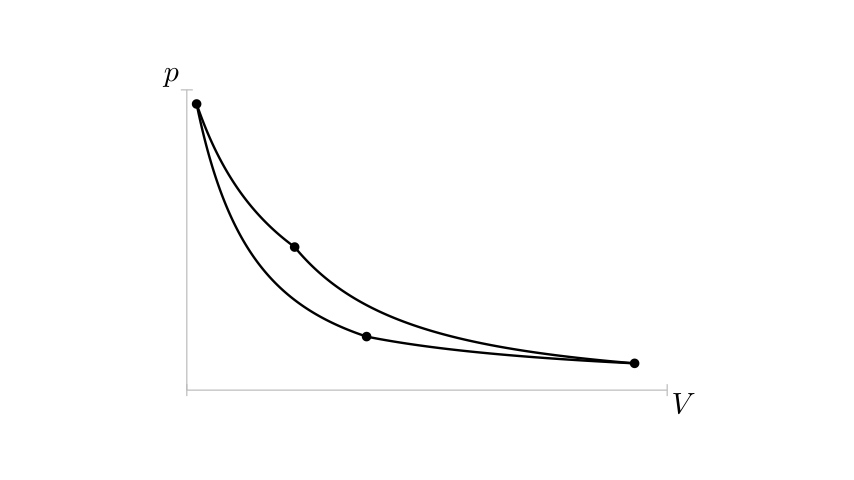

In [34]:
%%manim $param

Dot.set_default(color=BLACK)
dots = VGroup()
dots += Dot().move_to(isotherm12_graph.get_start())
dots += Dot().move_to(isotherm12_graph.get_end())
dots += Dot().move_to(isotherm34_graph.get_end())
dots += Dot().move_to(isotherm34_graph.get_start())

class Example(Scene):
    def construct(self):
        self.add(ax,lines,dots)

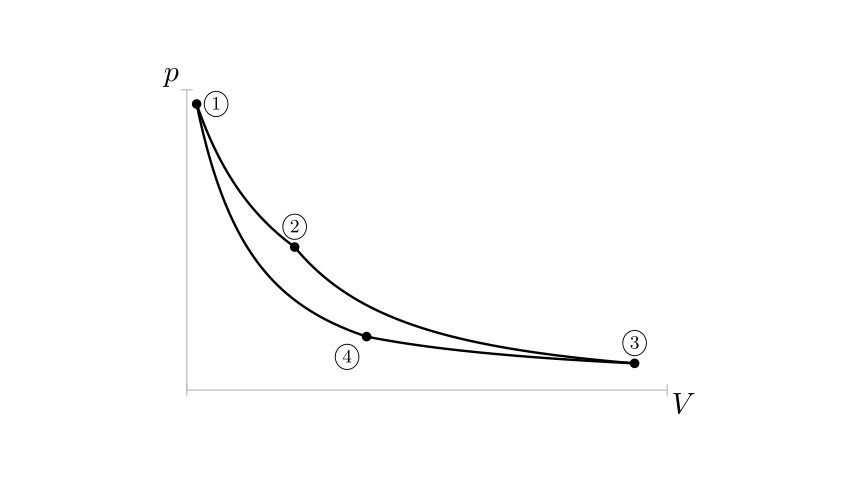

In [35]:
%%manim $param

nums= VGroup()
nums+= MathTex(r"{\large \textcircled{\small 1}} ").scale(0.7).next_to(dots[0],RIGHT,buff=0.4*SMALL_BUFF)
nums+= MathTex(r"{\large \textcircled{\small 2}} ").scale(0.7).next_to(dots[1],UP, buff=0.4 * SMALL_BUFF)
nums+= MathTex(r"{\large \textcircled{\small 3}} ").scale(0.7).next_to(dots[2],UP,buff=0.4*SMALL_BUFF)
nums+= MathTex(r"{\large \textcircled{\small 4}} ").scale(0.7).next_to(dots[3],DL ,buff=0.4*SMALL_BUFF)

class Example(Scene):
    def construct(self):
        self.add(ax,lines, dots,nums)

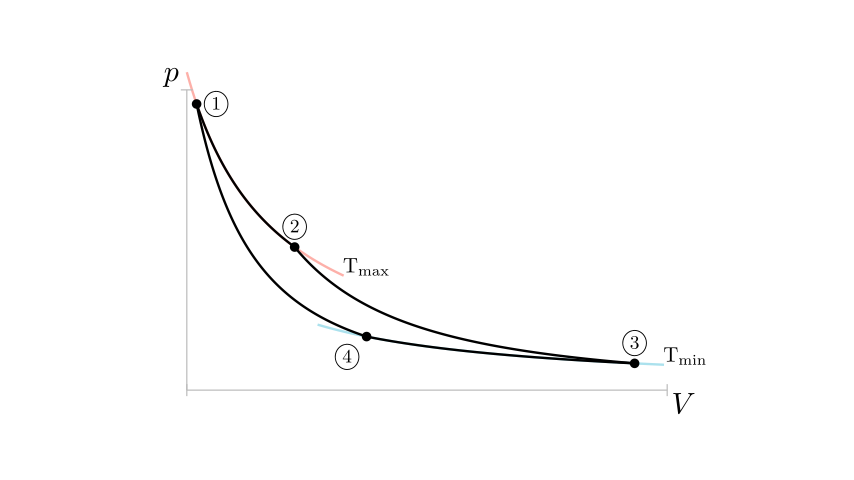

In [36]:
%%manim $param

background_strokes = VGroup()
background_strokes += ax.get_graph(lambda x: p_isotherm(x, Tmax),x_range=[V1 - 0.1, V2 + 0.5, 0.01], color=RED, stroke_opacity=0.5)
background_strokes += ax.get_graph(lambda x: p_isotherm(x, Tmin), x_range=[V3 + 0.3,V4 - 0.5,0.01], color=BLUE, stroke_opacity=0.5)
background_strokes.set_z_index(-1);
label = VGroup()
label += MathTex(r"\text{T}_{\text{min}}").scale(0.7).next_to(background_strokes[1],RIGHT,aligned_edge=DOWN, buff=0)
label += MathTex(r"\text{T}_{\text{max}}").scale(0.7).next_to(background_strokes[0],RIGHT,aligned_edge=DOWN, buff=0)
background_strokes += label

class Example(Scene):
    def construct(self):
        self.add(ax,lines, dots,nums,background_strokes)

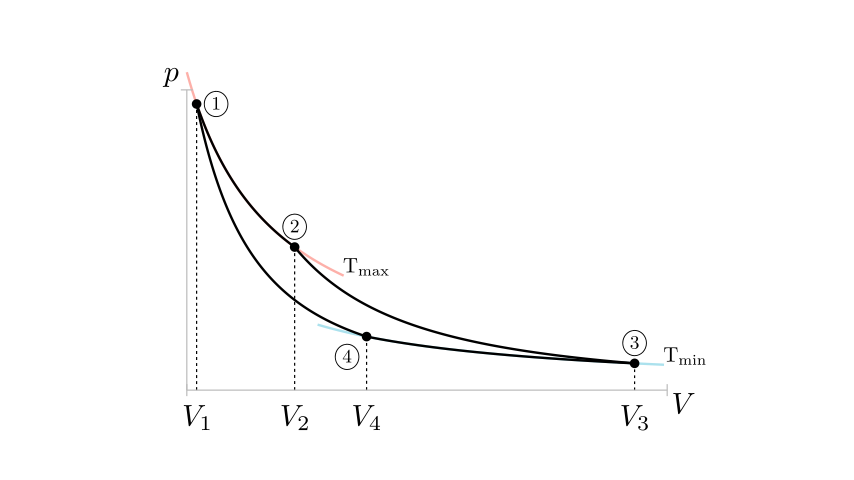

In [37]:
%%manim $param

downstrokes = VGroup()
downstrokes += ax.get_vertical_line(ax.i2gp(V1, isotherm12_graph), color=BLACK).set_z_index(-2)
downstrokes += ax.get_vertical_line(ax.i2gp(V2, isotherm12_graph), color=BLACK).set_z_index(-2)
downstrokes += ax.get_vertical_line(ax.i2gp(V3, isotherm34_graph), color=BLACK).set_z_index(-2)
downstrokes += ax.get_vertical_line(ax.i2gp(V4, isotherm34_graph), color=BLACK).set_z_index(-2)
down_labels= VGroup()
down_labels += MathTex("{ V }_{ 1 }").next_to(downstrokes[0], DOWN)
down_labels += MathTex("{ V }_{ 2 }").next_to(downstrokes[1], DOWN)
down_labels += MathTex("{ V }_{ 3 }").next_to(downstrokes[2], DOWN)
down_labels += MathTex("{ V }_{ 4 }").next_to(downstrokes[3], DOWN)

class Example(Scene):
    def construct(self):
        self.add(ax,lines, dots,nums,background_strokes, downstrokes,down_labels)

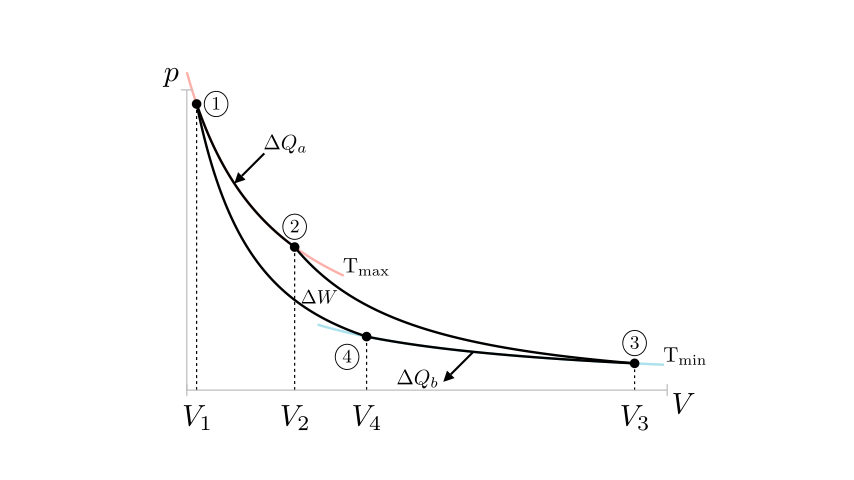

In [38]:
%%manim $param

heat_annotation = VGroup()
deltaW = MathTex(r"\Delta W").next_to(dots[3], UL).scale(0.65).shift(0.15 * UP)
bg = deltaW.add_background_rectangle(color=WHITE)
heat_annotation += deltaW

point = isotherm12_graph.point_from_proportion(0.5)
arrow = Arrow(point + UR * 0.5, point, buff=0).set_color(BLACK)
deltaQa = MathTex(r"\Delta Q_a").scale(0.7).next_to(arrow, UR, buff=0)
heat_annotation += arrow
heat_annotation += deltaQa

point = isotherm34_graph.point_from_proportion(0.4)
arrow = Arrow(point, point + DL * 0.5, buff=0).set_color(BLACK)
deltaQb = MathTex(r"\Delta Q_b").scale(0.7).next_to(arrow, LEFT, buff=0.1).shift(0.2 * DOWN)
heat_annotation += arrow
heat_annotation += deltaQb

class Example(Scene):
    def construct(self):
        self.add(ax,lines, dots,nums,background_strokes, downstrokes,down_labels,heat_annotation)

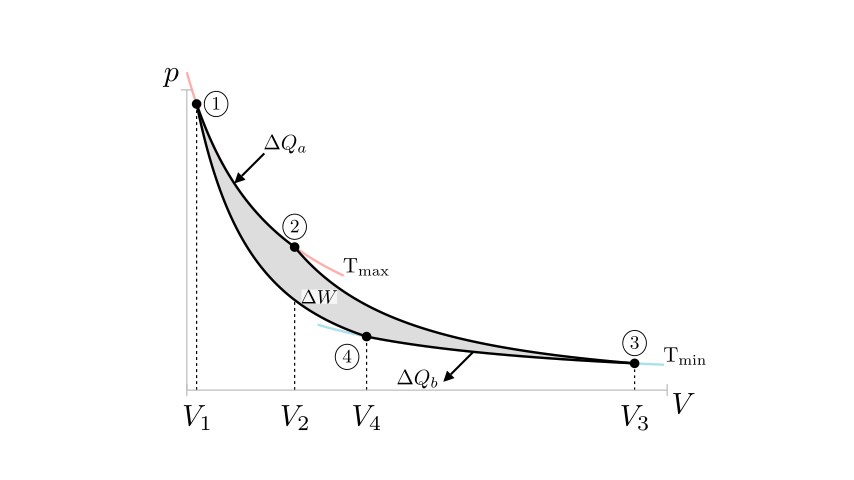

In [39]:
%%manim $param

c1 = Cutout(lines[0].copy().reverse_points(),lines[3]).set_opacity(1).set_color(GREEN)
c2 = Cutout(lines[1],lines[2])
bg_grey = Union(c1,c2, color=GREY_A).set_opacity(1)
bg_grey.z_index=-1

class Example(Scene):
    def construct(self): 
        #self.add(c1,c2)
        self.add(ax,lines, dots,nums,background_strokes)
        self.add(downstrokes,down_labels,heat_annotation,bg_grey)

In [40]:
carnot_graph= VGroup(ax,lines, dots,nums,background_strokes,downstrokes,down_labels,heat_annotation,bg_grey)

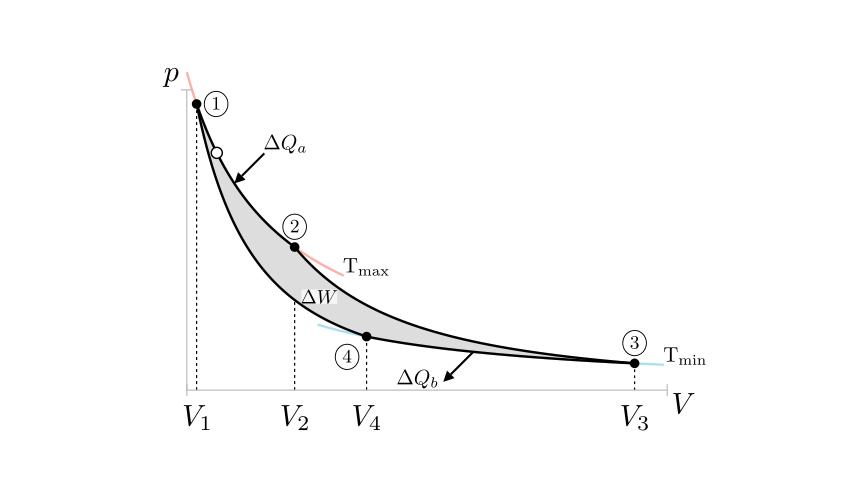

In [41]:
%%manim $param

sourunding_dot = Dot().scale(1.3).set_fill(color=BLACK).set_z_index(-1)
innerdot = Dot().set_color(WHITE).scale(1)
moving_dot = VGroup(sourunding_dot, innerdot)
moving_dot.move_to(isotherm12_graph.point_from_proportion(0.3))

class Example(Scene):
    def construct(self):        
        self.add(carnot_graph)
        self.add(moving_dot)

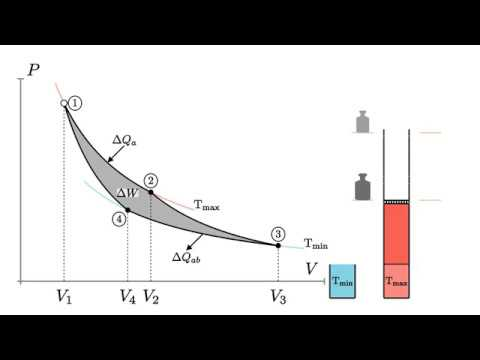

In [43]:
from IPython.display import YouTubeVideo
YouTubeVideo('_8RkZaiXP0E', width=400)